**Task # 3 -To Explore Unsupervised
Machine Learning**

In [18]:
# Starting with importing the usefull packages.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 

In [55]:
# Load the iris dataset
iris = datasets.load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
irisdata=iris.iloc[:,:].values
irisdata

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

([<matplotlib.axis.XTick at 0x7fcb4c4b29b0>,
 <a list of 10 Text major ticklabel objects>)

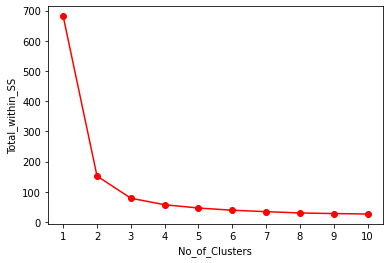

In [47]:
###### K means and scree plot ############
k = list(range(1,11))

TWSS = [] # variable for storing total within sum of squares for each kmeans 

for i in k:
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(irisdata)
    TWSS.append(kmeans.inertia_)
   

# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("Total_within_SS");plt.xticks(k)


In [51]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
kmeans=KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)  
kmeans.fit(irisdata)
y_kmeans = kmeans.fit_predict(irisdata)
kmeans.labels_ # getting the labels of clusters assigned to each row 
cluster= pd.Series(kmeans.labels_)  # converting numpy array into pandas series object 
# creating a  new column and assigning cluster
iris['Cluster']=cluster
#taking column wise and all row data 
iris = iris.iloc[:,[4,0,1,2,3]]
iris.head()

# getting aggregate mean of each cluster
a = iris.groupby(iris.Cluster).mean()


In [52]:
a

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
Cluster,,,,
0,5.742105,2.071053,6.850000,3.073684
1,1.462000,0.246000,5.006000,3.428000
2,4.393548,1.433871,5.901613,2.748387


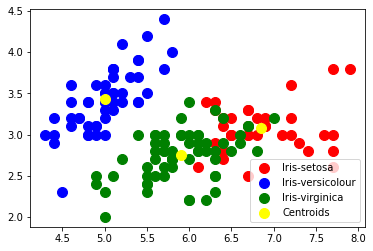

In [53]:
# Visualising the clusters - On the first two columns
plt.scatter(irisdata[y_kmeans == 0, 0], irisdata[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(irisdata[y_kmeans == 1, 0], irisdata[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(irisdata[y_kmeans == 2, 0], irisdata[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

The link to this task is here :  https://youtu.be/q-6SboW_Fvk